In [ ]:
!pip install scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install pycaret 

In [ ]:
!pip install pycaret markupsafe==2.0.1 --user

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 481.8/481.8 KB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.2/81.2 KB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.2/212.2 KB 11.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.0/150.0 KB 6.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.8/105.8 KB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.4/46.4 KB 2.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 46.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.0/298.0 KB 22.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 75.1 MB/s eta 0:00:00


In [ ]:
from pycaret.classification import *

In [3]:
import pandas as pd 

In [4]:
df = pd.read_excel('/content/drive/MyDrive/df_drama.xlsx')


FileNotFoundError: ignored

In [2]:
df.head()

NameError: ignored

In [ ]:
df = df.drop(['Unnamed: 0'],axis=1)

In [ ]:
#Оставляем в датасете 95% данных для дальнейшего моделирования
df_pc = df.sample(frac=0.70,random_state=1)
#Выделяем 5% данных для предсказаний
df_pc_us = df.drop(df_pc.index)
#Обновляем индексы
df_pc.reset_index(inplace=True, drop=True)
df_pc_us.reset_index(inplace=True, drop=True)
#Проверяем разбиение
print('Исходные данные: ' + str(df.shape))
print('Данные для моделирования: ' + str(df_pc.shape))
print('Данные для предсказаний: ' + str(df_pc_us.shape))
df_pc.head(2)

Исходные данные: (8790, 31)
Данные для моделирования: (6153, 31)
Данные для предсказаний: (2637, 31)


,year,Drama,type_Movie,type_show,cast_no_cast,Brazil,Canada,Egypt,France,India,...,Philippines,duration_season_1,duration_seasons_2,duration_seasons_3,duration_seasons_4,rating_pg_13,rating_r,rating_tv_14,rating_tv_ma,rating_tv_pg
0,2018,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,2016,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
mod=setup(df_pc, target = 'Drama', session_id=234, silent=True, fix_imbalance=True)

TypeError: ignored

In [ ]:
best_model = compare_models(sort='F1')
print(best_model)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lda,Linear Discriminant Analysis,0.6490,0.8006,0.8622,0.3247,0.4713,0.2824,0.3586,0.140
ridge,Ridge Classifier,0.6480,0.0000,0.8622,0.3240,0.4705,0.2812,0.3575,0.086
lr,Logistic Regression,0.6509,0.8004,0.8527,0.3249,0.4700,0.2814,0.3549,0.950
ada,Ada Boost Classifier,0.6646,0.7984,0.8197,0.3298,0.4699,0.2852,0.3490,0.668
lightgbm,Light Gradient Boosting Machine,0.6814,0.7963,0.7734,0.3361,0.4679,0.2883,0.3401,0.378
gbc,Gradient Boosting Classifier,0.6424,0.7984,0.8451,0.3176,0.4613,0.2688,0.3419,0.818
rf,Random Forest Classifier,0.6816,0.7861,0.7508,0.3330,0.4607,0.2801,0.3274,0.723
et,Extra Trees Classifier,0.6846,0.7776,0.7404,0.3340,0.4597,0.2800,0.3248,1.221
svm,SVM - Linear Kernel,0.6230,0.0000,0.8801,0.3106,0.4588,0.2607,0.3446,0.248
dt,Decision Tree Classifier,0.6828,0.7768,0.7394,0.3323,0.4579,0.2773,0.3222,0.199


INFO:logs:create_model_container: 14
INFO:logs:master_model_container: 14
INFO:logs:display_container: 2
INFO:logs:LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)
INFO:logs:compare_models() succesfully completed......................................


LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)


In [ ]:
ETC = create_model('et')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6667,0.7751,0.7736,0.3241,0.4568,0.2705,0.3239
1,0.6752,0.7907,0.8019,0.3346,0.4722,0.2909,0.3490
2,0.6889,0.8047,0.7925,0.3443,0.4800,0.3042,0.3581
3,0.6735,0.7403,0.6604,0.3111,0.4230,0.2344,0.2666
4,0.6421,0.7719,0.8000,0.3088,0.4456,0.2514,0.3137
5,0.6866,0.7901,0.6792,0.3258,0.4404,0.2584,0.2921
6,0.7021,0.7765,0.7358,0.3482,0.4727,0.3003,0.3412
7,0.6918,0.7749,0.7264,0.3377,0.4611,0.2835,0.3243
8,0.6918,0.7628,0.6604,0.3271,0.4375,0.2572,0.2873


INFO:logs:create_model_container: 15
INFO:logs:master_model_container: 15
INFO:logs:display_container: 3
INFO:logs:ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=234, verbose=0,
                     warm_start=False)
INFO:logs:create_model() succesfully completed......................................


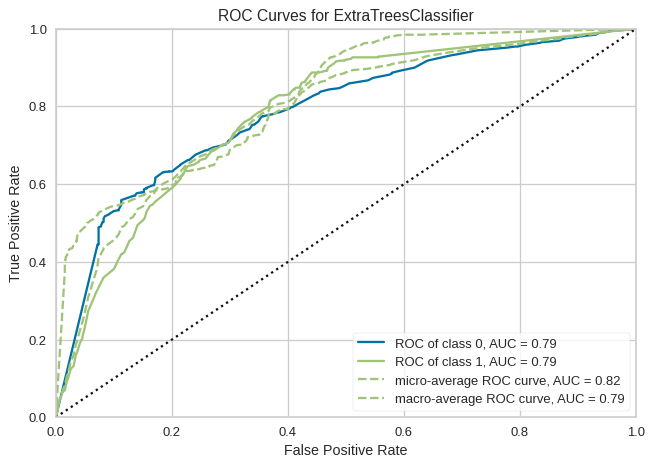

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [ ]:
plot_model(ETC,scale=1.3)

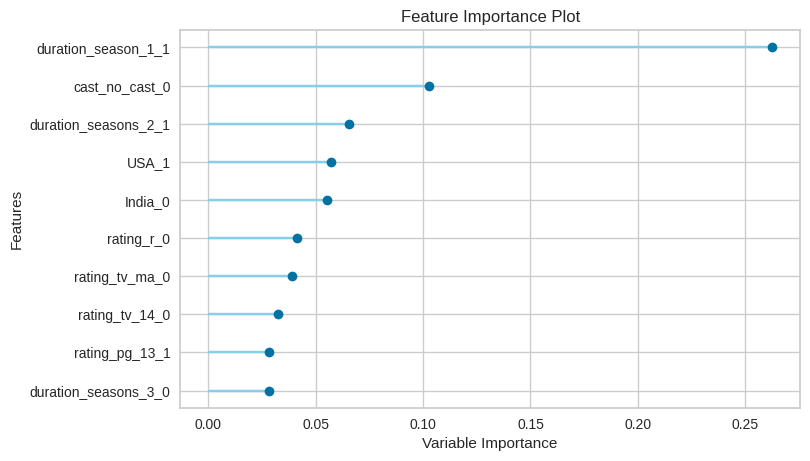

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [ ]:
plot_model(ETC, plot = 'feature')

In [ ]:
RFC = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6632,0.7834,0.7736,0.3216,0.4543,0.2665,0.3204
1,0.6769,0.7944,0.8208,0.3385,0.4793,0.2996,0.3615
2,0.6803,0.8142,0.7925,0.3373,0.4732,0.2937,0.3490
3,0.6735,0.7503,0.6698,0.3128,0.4264,0.2382,0.2720
4,0.6353,0.7818,0.8190,0.3071,0.4468,0.2508,0.3183
5,0.6866,0.7890,0.6981,0.3289,0.4471,0.2660,0.3027
6,0.6986,0.7926,0.7642,0.3491,0.4793,0.3065,0.3531
7,0.6866,0.7843,0.7358,0.3348,0.4602,0.2807,0.3240
8,0.6901,0.7682,0.6604,0.3256,0.4361,0.2550,0.2853


INFO:logs:create_model_container: 16
INFO:logs:master_model_container: 16
INFO:logs:display_container: 4
INFO:logs:RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=234, verbose=0,
                       warm_start=False)
INFO:logs:create_model() succesfully completed......................................


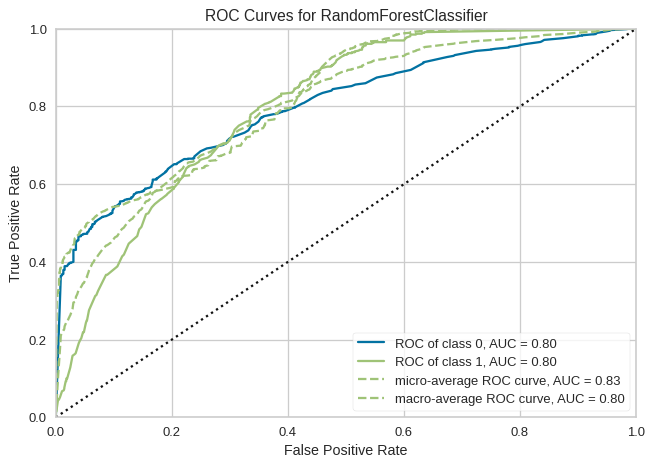

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [ ]:
plot_model(RFC,scale=1.3)

In [ ]:
blend = blend_models(estimator_list=[RFC,ETC])

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6650,0.7821,0.7736,0.3228,0.4556,0.2685,0.3221
1,0.6752,0.7946,0.8208,0.3372,0.4780,0.2976,0.3598
2,0.6803,0.8127,0.7925,0.3373,0.4732,0.2937,0.3490
3,0.6735,0.7498,0.6698,0.3128,0.4264,0.2382,0.2720
4,0.6353,0.7798,0.8190,0.3071,0.4468,0.2508,0.3183
5,0.6866,0.7906,0.6981,0.3289,0.4471,0.2660,0.3027
6,0.6969,0.7905,0.7547,0.3463,0.4748,0.3008,0.3459
7,0.6866,0.7835,0.7358,0.3348,0.4602,0.2807,0.3240
8,0.6901,0.7701,0.6604,0.3256,0.4361,0.2550,0.2853


INFO:logs:create_model_container: 17
INFO:logs:master_model_container: 17
INFO:logs:display_container: 5
INFO:logs:VotingClassifier(estimators=[('rf',
                              RandomForestClassifier(bootstrap=True,
                                                     ccp_alpha=0.0,
                                                     class_weight=None,
                                                     criterion='gini',
                                                     max_depth=None,
                                                     max_features='auto',
                                                     max_leaf_nodes=None,
                                                     max_samples=None,
                                                     min_impurity_decrease=0.0,
                                                     min_impurity_split=None,
                                                     min_samples_leaf=1,
                                                  

In [ ]:
tuned_blend = tune_model(blend)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6650,0.7831,0.7736,0.3228,0.4556,0.2685,0.3221
1,0.6769,0.7945,0.8208,0.3385,0.4793,0.2996,0.3615
2,0.6803,0.8141,0.7925,0.3373,0.4732,0.2937,0.3490
3,0.6735,0.7500,0.6698,0.3128,0.4264,0.2382,0.2720
4,0.6353,0.7815,0.8190,0.3071,0.4468,0.2508,0.3183
5,0.6866,0.7895,0.6981,0.3289,0.4471,0.2660,0.3027
6,0.6969,0.7925,0.7547,0.3463,0.4748,0.3008,0.3459
7,0.6866,0.7843,0.7358,0.3348,0.4602,0.2807,0.3240
8,0.6901,0.7680,0.6604,0.3256,0.4361,0.2550,0.2853


INFO:logs:create_model_container: 18
INFO:logs:master_model_container: 18
INFO:logs:display_container: 6
INFO:logs:VotingClassifier(estimators=[('rf',
                              RandomForestClassifier(bootstrap=True,
                                                     ccp_alpha=0.0,
                                                     class_weight=None,
                                                     criterion='gini',
                                                     max_depth=None,
                                                     max_features='auto',
                                                     max_leaf_nodes=None,
                                                     max_samples=None,
                                                     min_impurity_decrease=0.0,
                                                     min_impurity_split=None,
                                                     min_samples_leaf=1,
                                                  

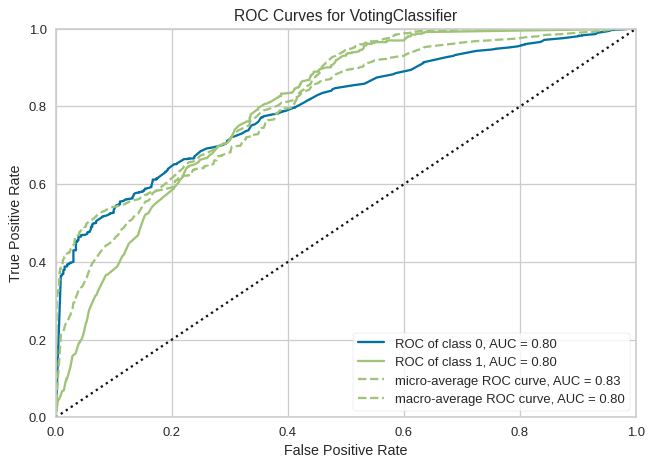

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [ ]:
plot_model(tuned_blend,scale=1.3)

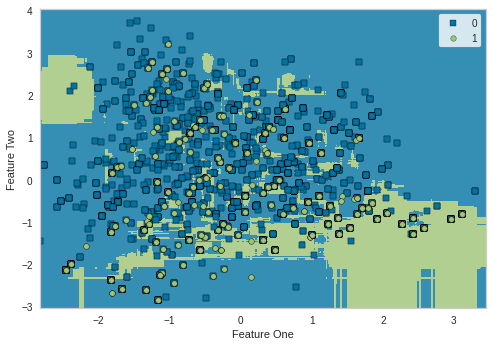

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [ ]:
plot_model(tuned_blend, plot = 'boundary')

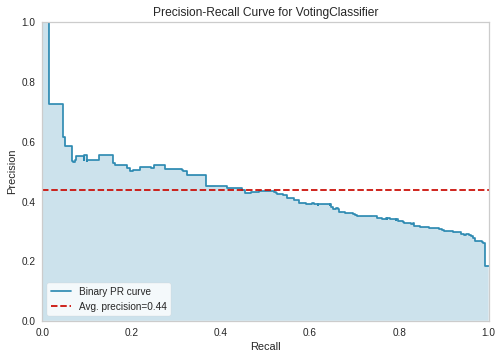

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [ ]:
plot_model(tuned_blend, plot = 'pr')

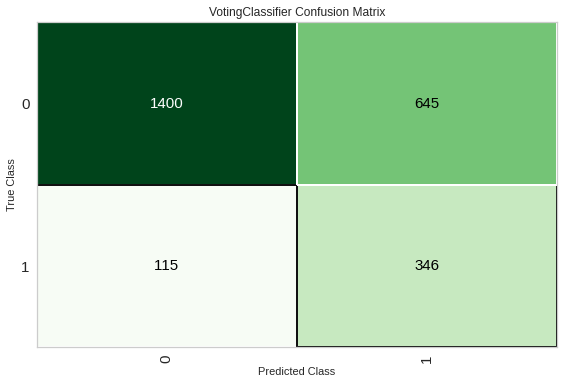

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [ ]:
plot_model(tuned_blend, plot = 'confusion_matrix')

In [ ]:
predict_model(tuned_blend);

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=VotingClassifier(estimators=[('rf',
                              RandomForestClassifier(bootstrap=True,
                                                     ccp_alpha=0.0,
                                                     class_weight=None,
                                                     criterion='gini',
                                                     max_depth=None,
                                                     max_features='auto',
                                                     max_leaf_nodes=None,
                                                     max_samples=None,
                                                     min_impurity_decrease=0.0,
                                                     min_impurity_split=None,
                                                     min_samples_leaf=1,
                                                     min_samples_split=2,
                  

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Voting Classifier,0.6967,0.7988,0.7505,0.3491,0.4766,0.3011,0.3448


In [ ]:
final_blend = finalize_model(tuned_blend)
print(final_blend)

INFO:logs:Initializing finalize_model()
INFO:logs:finalize_model(estimator=VotingClassifier(estimators=[('rf',
                              RandomForestClassifier(bootstrap=True,
                                                     ccp_alpha=0.0,
                                                     class_weight=None,
                                                     criterion='gini',
                                                     max_depth=None,
                                                     max_features='auto',
                                                     max_leaf_nodes=None,
                                                     max_samples=None,
                                                     min_impurity_decrease=0.0,
                                                     min_impurity_split=None,
                                                     min_samples_leaf=1,
                                                     min_samples_split=2,
                

VotingClassifier(estimators=[('rf',
                              RandomForestClassifier(bootstrap=True,
                                                     ccp_alpha=0.0,
                                                     class_weight=None,
                                                     criterion='gini',
                                                     max_depth=None,
                                                     max_features='auto',
                                                     max_leaf_nodes=None,
                                                     max_samples=None,
                                                     min_impurity_decrease=0.0,
                                                     min_impurity_split=None,
                                                     min_samples_leaf=1,
                                                     min_samples_split=2,
                                                     min_weight_fraction_leaf=0.0,
        

In [ ]:
unseen_predictions = predict_model(final_blend, data=df_pc_us)
unseen_predictions.head(20)


INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=VotingClassifier(estimators=[('rf',
                              RandomForestClassifier(bootstrap=True,
                                                     ccp_alpha=0.0,
                                                     class_weight=None,
                                                     criterion='gini',
                                                     max_depth=None,
                                                     max_features='auto',
                                                     max_leaf_nodes=None,
                                                     max_samples=None,
                                                     min_impurity_decrease=0.0,
                                                     min_impurity_split=None,
                                                     min_samples_leaf=1,
                                                     min_samples_split=2,
                  

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Voting Classifier,0.6636,0.7773,0.7468,0.3155,0.4436,0.2557,0.3046


,year,Drama,type_Movie,type_show,cast_no_cast,Brazil,Canada,Egypt,France,India,...,duration_seasons_2,duration_seasons_3,duration_seasons_4,rating_pg_13,rating_r,rating_tv_14,rating_tv_ma,rating_tv_pg,Label,Score
0,2021,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0.9811
1,2021,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1.0000
2,2021,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.9906
3,2021,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1.0000
4,2021,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.9906
5,2021,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0.6660
6,2021,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,1,0.7977
7,2021,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0.8759
8,2021,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0.6745
9,2021,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0.5095


In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

In [ ]:
import matplotlib.pyplot as plt

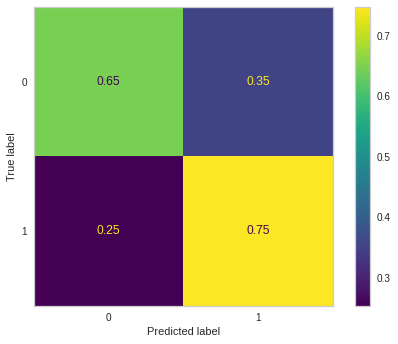

In [ ]:
pccm=confusion_matrix(unseen_predictions['Drama'],unseen_predictions['Label'],normalize='true')
disppc = ConfusionMatrixDisplay(pccm, display_labels=['0','1'])
plt.rcParams["axes.grid"] = False
disppc.plot()

In [ ]:
from pycaret.utils import check_metric
check_metric(actual=unseen_predictions['Drama'],
             prediction=unseen_predictions['Label'],metric='F1')

0.4436

In [ ]:
save_model(final_blend,'final_blend 26.02.2023')

INFO:logs:Initializing save_model()
INFO:logs:save_model(model=VotingClassifier(estimators=[('rf',
                              RandomForestClassifier(bootstrap=True,
                                                     ccp_alpha=0.0,
                                                     class_weight=None,
                                                     criterion='gini',
                                                     max_depth=None,
                                                     max_features='auto',
                                                     max_leaf_nodes=None,
                                                     max_samples=None,
                                                     min_impurity_decrease=0.0,
                                                     min_impurity_split=None,
                                                     min_samples_leaf=1,
                                                     min_samples_split=2,
                            

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=False, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='Drama',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strat...
                                                                     max_features='auto',
                                                                     max_leaf_nodes=None,
                                                                     max_samples=None,
       

In [ ]:
saved_blend = load_model('final_blend 26.02.2023')

INFO:logs:Initializing load_model()
INFO:logs:load_model(model_name=final_blend 26.02.2023, platform=None, authentication=None, verbose=True)


Transformation Pipeline and Model Successfully Loaded


In [ ]:
new_prediction = predict_model(saved_blend, data=df_pc_us)
new_prediction.to_excel('new_wine_predictions.xls')
new_prediction.head(20)

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=False, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='Drama',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_strat...
                                                                    max_features='auto',
                                                                    max_leaf_nodes=None,
                                    

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Voting Classifier,0.6636,0.7773,0.7468,0.3155,0.4436,0.2557,0.3046


,year,Drama,type_Movie,type_show,cast_no_cast,Brazil,Canada,Egypt,France,India,...,duration_seasons_2,duration_seasons_3,duration_seasons_4,rating_pg_13,rating_r,rating_tv_14,rating_tv_ma,rating_tv_pg,Label,Score
0,2021,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0.9811
1,2021,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1.0000
2,2021,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.9906
3,2021,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1.0000
4,2021,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.9906
5,2021,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0.6660
6,2021,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,1,0.7977
7,2021,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0.8759
8,2021,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0.6745
9,2021,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0.5095
